In [1]:
import timm
import os
os.environ["TORCH_HOME"] = "/home/eragon/Documents/Datasets/"

/home/eragon/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from fastai.vision.all import *
from pathlib import Path

In [3]:
path = Path("/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation")

In [4]:
path.ls()

(#39) [Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Pepper,_bell___Bacterial_spot'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Corn___Common_rust'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Cherry___healthy'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Tomato___Early_blight'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Corn___healthy'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Blueberry

In [5]:
files = get_image_files(path)
files

(#55448) [Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy/image (796).JPG'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy/image (449).JPG'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy/image (1618).JPG'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy/image (1025).JPG'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy/image (1278).JPG'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy/image (876).JPG'),Path('/home/eragon/Documents/Datasets/plantdisease/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy/image (1397).JPG'),Path('/home/eragon/Documents/Datasets/pla

In [6]:
files[0].parent.name

'Apple___healthy'

In [7]:
def label_func(f): return Path(f).parent.name

In [8]:
dls = ImageDataLoaders.from_lists(path, fnames = files, labels = files.map(label_func), item_tfms=Resize(224))

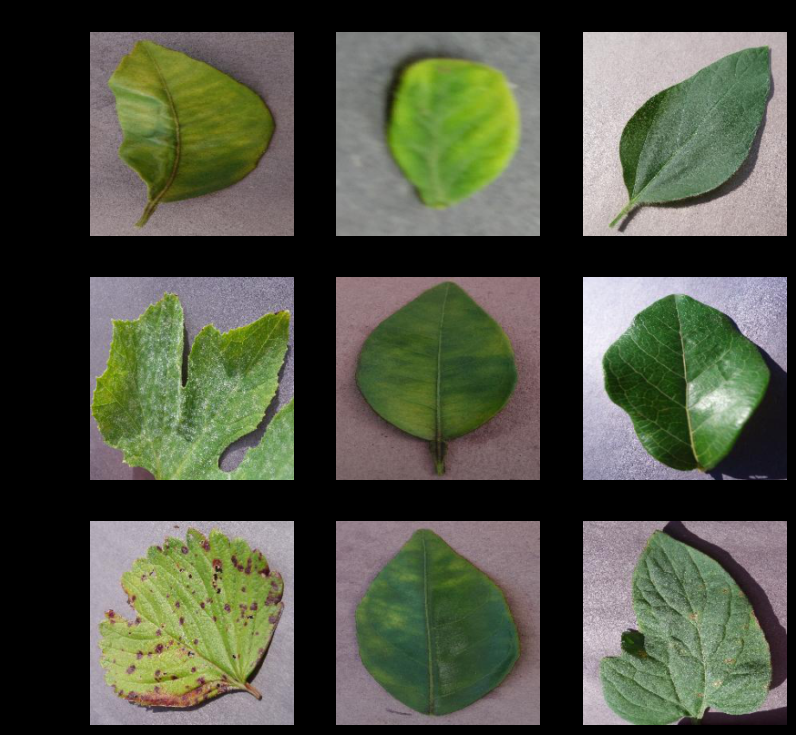

In [9]:
dls.show_batch()

In [10]:
dls.c

39

In [11]:
learn = vision_learner(dls, arch ="vit_base_patch16_224" , metrics=accuracy, pretrained=True, cbs = [MixedPrecision])

In [12]:
learn.fine_tune(40)

KeyboardInterrupt: 